In [52]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
N = 51
x_start, x_end = -1.,2.
y_start, y_end = -0.5,0.5
x = np.linspace(x_start,x_end,N)
y = np.linspace(y_start,y_end,N)
X,Y = np.meshgrid(x,y)

In [54]:
def get_velocity(strength,xs,ys,X,Y):
    """Return the velocity field generated by a source/sink.
    
    Arguments
    ---------
    strength -- strength of the source/sink
    xs,ys    -- coordinates of the source/sink
    X,Y      -- mesh grid
    """
    u = strength/(2*np.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v = strength/(2*np.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    
    return u,v

In [55]:
u_inf = 1.

u_freestream = u_inf * np.ones((N,N),dtype=float)
v_freestream = np.zeros((N,N))

In [56]:
xy = np.loadtxt('../lessons/resources/naca0012.dat',unpack='True')

x_sources = np.loadtxt('../lessons/resources/NACA0012_x.txt')
y_sources = np.loadtxt('../lessons/resources/NACA0012_y.txt')
sigmas = np.loadtxt('../lessons/resources/NACA0012_sigma.txt')

In [57]:
naca_velocities = np.array([get_velocity(sigmas[i],x_sources[i],y_sources[i],X,Y) for i in xrange(len(sigmas))])
naca_sum = np.sum(naca_velocities,axis = 0)

In [58]:
u = u_freestream + naca_sum[0,:,:]
v = v_freestream + naca_sum[1,:,:]

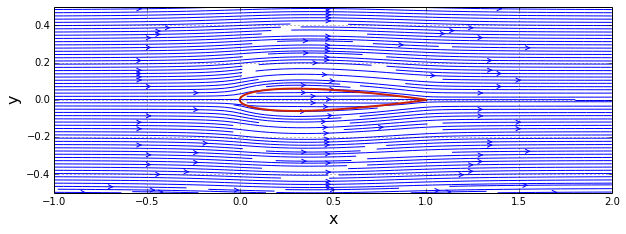

In [59]:
size = 10
ar = (y_end-y_start)/(x_end-x_start)
plt.figure(figsize = (size,ar*size))
plt.grid(True)
plt.xlabel('x',fontsize = 16)
plt.ylabel('y',fontsize = 16)
plt.xlim(x_start,x_end)
plt.ylim(y_start,y_end)
plt.streamplot(X,Y,u,v,density = 2,linewidth=1,arrowsize=1,arrowstyle='->')
plt.plot(xy[0],xy[1],linewidth = 2, color = '#CD2305')

In [76]:
cp = 1. - (u**2+v**2)/u_inf**2

ind_max = np.unravel_index(np.argmax(cp),cp.shape)
cp_max = cp[ind_max]
print "Maximum presure coefficient Cp_max = {0:.2f} \
at index ({1[0]},{1[1]})".format(cp_max,ind_max)


Maximum presure coefficient Cp_max = 0.47 at index (25,16)


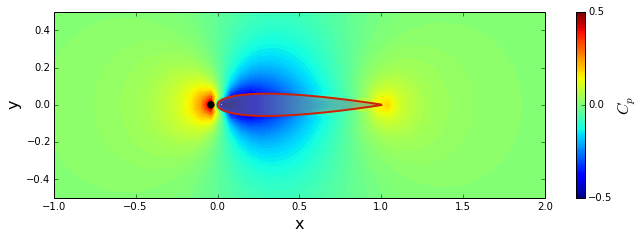

In [74]:
plt.figure(figsize=(1.1*size,ar*size))
plt.xlabel('x',fontsize = 16)
plt.ylabel('y',fontsize = 16)
plt.xlim(x_start,x_end)
plt.ylim(y_start,y_end)
contf = plt.contourf(X,Y,cp,levels = np.linspace(-0.5,0.5,100),
                    )
cbar=plt.colorbar(contf)
cbar.set_ticks([-0.5,0,0.5])
cbar.set_label('$C_p$',fontsize = 16)
plt.plot(xy[0],xy[1],linewidth = 2, color = '#CD2305')
plt.fill(xy[0],xy[1],color = 'grey',alpha = .5)
plt.scatter(X[ind_max],Y[ind_max], color = 'k',s=40,marker = 'o')